# NASA MODIS green data

In [1]:
# Initialize Earth Engine
import ee
ee.Initialize()

In [2]:
import geemap

# Define an area of interest (optional). Here, we'll use the entire world.
AOI = ee.Geometry.Rectangle([-180, -90, 180, 90])

# Fetch the MODIS NDVI dataset for a given date range
start_date = '2000-06-01'
end_date = '2010-07-01'
MODIS_NDVI = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date(start_date), ee.Date(end_date)).select('NDVI')

# Calculate the mean NDVI for the date range
mean_NDVI = MODIS_NDVI.mean()

# Define visualization parameters
vis_params = {
    'min': 0,
    'max': 9000,
    'palette': ['red', 'yellow', 'green', 'darkgreen', 'blue'],
    'breakpoints': [0, 3000, 6000, 8500, 9000]
}

# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(mean_NDVI, vis_params, 'Mean NDVI')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map




Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [3]:
import geemap

# Define an area of interest (optional). Here, we'll use the entire world.
AOI = ee.Geometry.Rectangle([-180, -90, 180, 90])

# Fetch the MODIS NDVI dataset for a given date range
start_date = '2022-06-01'
end_date = '2022-07-01'
MODIS_NDVI = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date(start_date), ee.Date(end_date)).select('NDVI')

# Calculate the mean NDVI for the date range
mean_NDVI = MODIS_NDVI.mean()

# Define visualization parameters
vis_params = {
    'min': 0,
    'max': 9000,
    'palette': ['red', 'yellow', 'green', 'darkgreen', 'blue'],
    'breakpoints': [0, 3000, 6000, 8500, 9000]
}

# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(mean_NDVI, vis_params, 'Mean NDVI')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map


Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [4]:
# info
print(mean_NDVI.getInfo())

{'type': 'Image', 'bands': [{'id': 'NDVI', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -32768, 'max': 32767}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}


# Look at difference between 2000 and 2022


In [5]:
# Define date ranges for summers of 2000-2003 and 2019-2022
dates_2000_2003 = [('2000-06-01', '2000-08-31'), ('2001-06-01', '2001-08-31'), 
                   ('2002-06-01', '2002-08-31'), ('2003-06-01', '2003-08-31')]

dates_2019_2022 = [('2019-06-01', '2019-08-31'), ('2020-06-01', '2020-08-31'), 
                   ('2021-06-01', '2021-08-31'), ('2022-06-01', '2022-08-31')]

# Fetch and average MODIS NDVI data for each period
def fetch_avg_NDVI(dates):
    image_list = []
    for start, end in dates:
        print(f'Fetching data for {start} to {end}')

        # Fetch the MODIS NDVI dataset for a given date range
        MODIS_NDVI = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date(start), ee.Date(end)).select('NDVI')

        # Calculate the mean NDVI for the date range
        mean_NDVI = MODIS_NDVI.mean()
       
        # Add the image to the list
        image_list.append(mean_NDVI)

    # Combine the list into an image collection
    print(f'\nlength of image_list: {len(image_list)}')
    combined_collection = ee.ImageCollection(image_list)

    return combined_collection.mean()

avg_NDVI_2000_2003 = fetch_avg_NDVI(dates_2000_2003)
avg_NDVI_2019_2022 = fetch_avg_NDVI(dates_2019_2022)



Fetching data for 2000-06-01 to 2000-08-31
Fetching data for 2001-06-01 to 2001-08-31
Fetching data for 2002-06-01 to 2002-08-31
Fetching data for 2003-06-01 to 2003-08-31

length of image_list: 4
Fetching data for 2019-06-01 to 2019-08-31
Fetching data for 2020-06-01 to 2020-08-31
Fetching data for 2021-06-01 to 2021-08-31
Fetching data for 2022-06-01 to 2022-08-31

length of image_list: 4


# ... Visualization and further analysis ...


In [6]:
# ... Visualization and further analysis ...

# Compute the difference between the two periods
NDVI_difference = avg_NDVI_2019_2022.subtract(avg_NDVI_2000_2003)



# Define visualization parameters
vis_params = {
    'min': -3000,
    'max': 3000,
    'palette': ['darkred', 'red', 'lightcoral', 'white', 'lightgreen', 'green', 'darkgreen']


}


# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(NDVI_difference, vis_params, 'NDVI diff')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")

Map

Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [7]:
# info
print(NDVI_difference.getInfo())
print(NDVI_difference.getInfo()['bands'][0]['id'])
print('')

{'type': 'Image', 'bands': [{'id': 'NDVI', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -65535, 'max': 65535}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}
NDVI



# Nr of pixels


In [8]:
# Define a global rectangle that avoids the dateline between Russia and Alaska
global_aoi = ee.Geometry.Rectangle([-180, -90, 180, 90
], proj='EPSG:4326', geodesic=False)



# make a function to return the pixel count
def pixel_count(image, aoi):
    pixel_count = image.reduceRegion(
        reducer=ee.Reducer.count(),
        geometry=aoi,
        scale=1000,
        maxPixels=1e13  # Increase this if needed
    ).get('NDVI').getInfo()

    return pixel_count

count = pixel_count(NDVI_difference, global_aoi)
print(f'pixel count with function: {count:.1e}')


pixel count with function: 1.9e+08


# Sampling

In [9]:

# Sample the NDVI_difference image using the adjusted global AOI
sample = NDVI_difference.sample(region=global_aoi, seed=1, geometries=True, scale=10000, factor=0.03)


# Check the number of sample points
num_samples = sample.size().getInfo()
print(f"Number of sample points: {num_samples}")

# Convert FeatureCollection to List
# sample_list = sample.toList(sample.size())
# print(f"Sample list length: {sample_list.size().getInfo()}")
# print(f"Sample list type: {type(sample_list)}")
# print(f"Sample list element type: {type(sample_list.get(0))}")
# print(f'\nfirst element: {sample_list.get(0).getInfo()}')

# Convert FeatureCollection to List
# sample_list = sample.toList(sample.size())

# Extract coordinates OBS: MAX 5000 POINTS-------------------------
# sample_features = sample.getInfo()['features']
# coordinates = [feature['geometry']['coordinates'] for feature in sample_features]


# print(f'length of coordinates: {len(coordinates)}')


# # Warning: this next part will take a while to run!
# Map = geemap.Map()
# Map.centerObject(AOI, 2)  # Center on Luxembourg and zoom in

# Add each coordinate as a marker
# for coord in coordinates:
#     Map.add_marker(location=(coord[1], coord[0]), color="red")

# Map


Number of sample points: 65960


In [10]:
#print(f'first sample feature: {sample_features[0]}')
#print(f'second sample feature: {sample_features[1]}')

In [11]:
# test wether the ndvi values of sample coordinates are the same as the ones in the NDVI_difference image

#print(f'NDVI diff value of first sample point: {sample_features[0]["properties"]}')
#print(f'coordinates of first sample point: {coordinates[0]}')

# Locate pixel and ndvi value of first sample point from NDVI_difference image
#pixel = NDVI_difference.reduceRegion(ee.Reducer.first(), ee.Geometry.Point(coordinates[0]), 1000)
#print(f'NDVI diff value of first sample point: {pixel.getInfo()}')

# second sample point
#print(f'\nNDVI diff value of second sample point: {sample_features[1]["properties"]}')
#print(f'coordinates of second sample point: {coordinates[1]}')

# Locate pixel and ndvi value of second sample point from NDVI_difference image
#pixel = NDVI_difference.reduceRegion(ee.Reducer.first(), ee.Geometry.Point(coordinates[1]), 1000)
#print(f'NDVI diff value of second sample point: {pixel.getInfo()}')



# Map samples

In [12]:
# Buffer each point to create a 10x10 km circle around each point
bufferedFeatures = sample.map(lambda feature: feature.buffer(5000))

# Convert buffered feature collection back to image with NDVI values
sample_image = ee.Image().float().paint(bufferedFeatures, 'NDVI', 2)



ndvi_vis_params = {
    'min': -500,
    'max': 500,
    'palette': ['brown', 'yellow', 'green']
}

Map = geemap.Map()
Map.centerObject(AOI, 2)  

# Add the sample_image with the NDVI color palette
Map.addLayer(sample_image, ndvi_vis_params, "Sampled NDVI Values")

Map.add_colorbar(ndvi_vis_params, label="NDVI")
Map


Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

# Histogram and Results

In [13]:
# Convert the sample to a NDVI list for plotting
import numpy as np
data_list = sample.aggregate_array('NDVI').getInfo()

#  Convert the list to a numpy array
NDVI_data = np.array(data_list)
print(f'data length: {len(NDVI_data)}')

data length: 65960


In [14]:
# convert samples to a list of coordinates
#sample_features = sample.getInfo()['features']


In [15]:
# Convert data to a pandas dataframe
import pandas as pd
df = pd.DataFrame(NDVI_data, columns=['NDVI'])


In [16]:
# results
mean_diff = np.mean(NDVI_data)
std_diff = np.std(NDVI_data)
diff_len = len(NDVI_data)
print(f'Length: {diff_len}')
print(f'Mean: {mean_diff}')
print(f'Standard deviation: {std_diff}')

# remove outliers
clean_data = NDVI_data[np.abs(NDVI_data) <= 2000]
print(f'\nlength after removing outliers: {len(clean_data)}')
print(f'mean after removing outliers: {np.mean(clean_data)}')
print(f'std after removing outliers: {np.std(clean_data)}')


Length: 65960
Mean: 150.12297183478202
Standard deviation: 438.75297620126986

length after removing outliers: 65749
mean after removing outliers: 147.9524175906351
std after removing outliers: 412.1764128657947


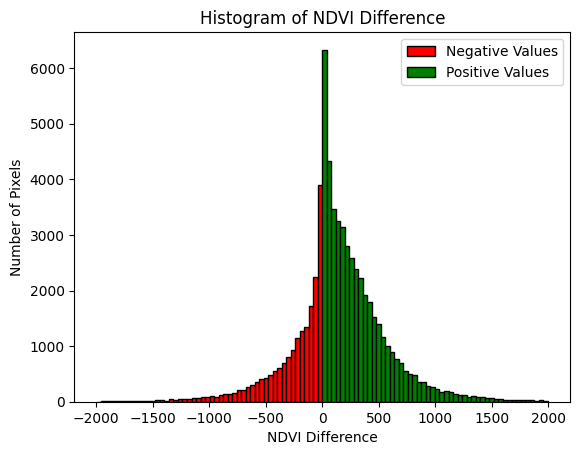

In [17]:

import matplotlib.pyplot as plt


# Separate the data into positive and negative values
negative_data = clean_data[clean_data< 0]
positive_data = clean_data[clean_data >= 0]

# Plot the histogram for negative values
plt.hist(negative_data, bins=50, color='red', edgecolor='black', label='Negative Values')

# Plot the histogram for positive values
plt.hist(positive_data, bins=50, color='green', edgecolor='black', label='Positive Values')

plt.title('Histogram of NDVI Difference')
plt.xlabel('NDVI Difference')
plt.ylabel('Number of Pixels')
plt.legend()
plt.show()


# Clustering


### Filtering

In [18]:
# Separate the data into positive and negative values
# Filtering

positive_samples = sample.filter(ee.Filter.gt('NDVI', 0))
negative_samples = sample.filter(ee.Filter.lt('NDVI', 0))
zero_diff_samples = sample.filter(ee.Filter.eq('NDVI', 0))

positive_nr = positive_samples.size().getInfo()
negative_nr = negative_samples.size().getInfo()
zero_diff_nr = zero_diff_samples.size().getInfo()
print(f'positive samples: {positive_nr}')
print(f'negative samples: {negative_nr}')
print(f'zero diff samples: {zero_diff_nr}')
print(f'total samples: {positive_nr + negative_nr + zero_diff_nr}')

positive samples: 46548
negative samples: 19406
zero diff samples: 6
total samples: 65960


### Adding coordinates as features

In [19]:
# testing
# Check the properties of the first feature in positive_samples
first_positive_sample = positive_samples.first()
print(first_positive_sample.getInfo()['properties'])

# Check the properties of the first feature in negative_samples
first_negative_sample = negative_samples.first()
print(first_negative_sample.getInfo()['properties'])

# need to add coordinates to the sample features
def add_coordinates(feature):
    # Return the feature with a longitude and latitude property.
   
    return feature.set('longitude', feature.geometry().coordinates().get(0))  \
                  .set('latitude', feature.geometry().coordinates().get(1))  \
                    

def normalize_NDVI(feature):
    # normalize NDVI values to range from -1 to 1
    return feature.set('NDVI', feature.getNumber('NDVI').divide(10000))  \

def normalize_coordinates(feature):
    # normalize coordinates to range from -1 to 1
    return feature.set('longitude', feature.getNumber('longitude').divide(180))  \
                  .set('latitude', feature.getNumber('latitude').divide(90))  \
# Map the function over the sample
positive_samples_with_coordinates = positive_samples.map(add_coordinates)
negative_samples_with_coordinates = negative_samples.map(add_coordinates)

samples_with_coordinates = sample.map(add_coordinates)

# Testing again
first_positive_sample = positive_samples_with_coordinates.first()
print(first_positive_sample.getInfo()['properties'])
first_negative_sample = negative_samples_with_coordinates.first()
print(first_negative_sample.getInfo()['properties'])

first_samples_with_coordinates = samples_with_coordinates.first()
print('\nsamples both positive and negative:')
print(first_samples_with_coordinates.getInfo()['properties'])

# Normalize the NDVI values
normalized_positive_samples = positive_samples_with_coordinates.map(normalize_NDVI)
normalized_negative_samples = negative_samples_with_coordinates.map(normalize_NDVI)
normalized_neutral_samples = samples_with_coordinates.map(normalize_NDVI)

# Testing again
print(f'first positive sample: {normalized_positive_samples.first().getInfo()["properties"]}')
print(f'first normalized negative sample: {normalized_negative_samples.first().getInfo()["properties"]}')


{'NDVI': 254.20833333333348}
{'NDVI': -37.374999999999545}
{'NDVI': 254.20833333333348, 'latitude': -46.25892916119886, 'longitude': -68.63121776392138}
{'NDVI': -37.374999999999545, 'latitude': 45.617693606693955, 'longitude': 71.28187575207517}

samples both positive and negative:
{'NDVI': 254.20833333333348, 'latitude': -46.25892916119886, 'longitude': -68.63121776392138}
first positive sample: {'NDVI': 0.025420833333333347, 'latitude': -46.25892916119886, 'longitude': -68.63121776392138}
first normalized negative sample: {'NDVI': -0.0037374999999999544, 'latitude': 45.617693606693955, 'longitude': 71.28187575207517}


In [20]:
# add longitudes and latitudes to df
data_list1 = samples_with_coordinates.aggregate_array('longitude').getInfo()
data_list2 = samples_with_coordinates.aggregate_array('latitude').getInfo()

# convert to numpy array
longitudes = np.array(data_list1)
latitudes = np.array(data_list2)
print(f'length of longitudes: {len(longitudes)}')
print(f'length of latitudes: {len(latitudes)}')

length of longitudes: 65960
length of latitudes: 65960


In [21]:
# Add the longitudes and latitudes to the dataframe
df['longitude'] = longitudes
df['latitude'] = latitudes
df['NDVI'] = NDVI_data /100


# dbscan
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Normalize the NDVI values by dividing by 10000

# Compute DBSCAN
X = df[['longitude', 'latitude', 'NDVI']].values
db = DBSCAN(eps=3, min_samples=100).fit(X)


labels = db.labels_
print(f'length of labels: {len(labels)}')


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f'number of clusters: {n_clusters_}')
print(f'number of noise points: {list(labels).count(-1)}')
print(f'number of points in each cluster: {np.bincount(labels + 1)}')



length of labels: 65960
number of clusters: 18
number of noise points: 45709
number of points in each cluster: [45709  8752  1530  2313   352  2004  2243   557   482   366   175   519
   137   203   127   105   126   160   100]


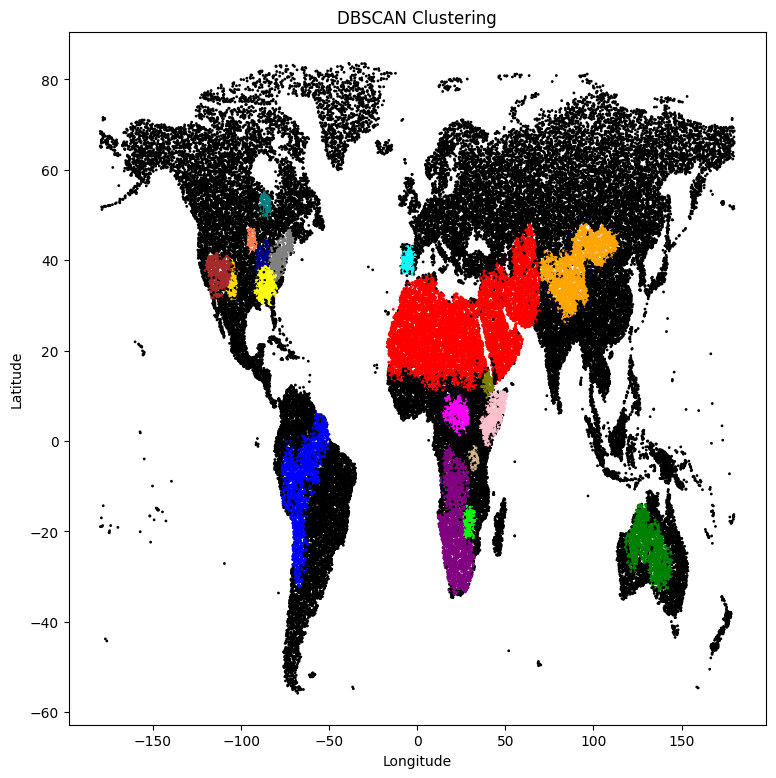

In [22]:
# plot results
import matplotlib.pyplot as plt


figure = plt.figure(figsize=(9, 9))
cluster_colors = {-1: 'black', 0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'orange', 5: 'purple', 6: 'pink', 7: 'brown', 8: 'gray', 9: 'cyan', 10: 'magenta', 11: 'olive', 12: 'lime', 13: 'teal', 14: 'coral', 15: 'gold', 16: 'navy', 17: 'tan', 18: 'darkorange', 19: 'darkred', 20: 'darkgreen', 21: 'darkblue', 22: 'darkyellow', 23: 'darkorange', 24: 'darkpurple', 25: 'darkpink', 26: 'darkbrown', 27: 'darkgray', 28: 'darkcyan', 29: 'darkmagenta', 30: 'darkolive', 31: 'darklime', 32: 'darkteal', 33: 'darkcoral', 34: 'darkgold', 35: 'darknavy', 36: 'darktan', 37: 'lightred', 38: 'lightgreen', 39: 'lightblue', 40: 'lightyellow', 41: 'lightorange', 42: 'lightpurple', 43: 'lightpink', 44: 'lightbrown', 45: 'lightgray', 46: 'lightcyan', 47: 'lightmagenta', 48: 'lightolive', 49: 'lightlime', 50: 'lightteal', 51: 'lightcoral', 52: 'lightgold', 53: 'lightnavy', 54: 'lighttan'}
plt.scatter(df['longitude'], df['latitude'], c=[cluster_colors[label] for label in labels],s=1)
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [23]:
# Clustering
# Clusters of NDVI difference values


# Define the number of clusters
n_clusters = 3

# positive_clusterer = ee.Clusterer.wekaKMeans(n_clusters).train(positive_samples_with_coordinates)
# negative_clusterer = ee.Clusterer.wekaKMeans(n_clusters).train(negative_samples_with_coordinates)

# positive_clustered_image = NDVI_difference.cluster(positive_clusterer)
# negative_clustered_image = NDVI_difference.cluster(negative_clusterer)

# neutral_clusterer = ee.Clusterer.wekaKMeans(n_clusters).train(samples_with_coordinates)
# neutral_clustered_image = NDVI_difference.cluster(neutral_clusterer)

normalized_neutral_clusterer = ee.Clusterer.wekaKMeans(n_clusters).train(normalized_neutral_samples)
normalized_neutral_clustered_image = NDVI_difference.cluster(normalized_neutral_clusterer)



#  Define visualization parameters for the clusters

# Visualization parameters
viz_params = {
    'min': 0,
    'max': n_clusters - 1, 
    'palette': ['red', 'green', 'blue']
}

Map.clear()
Map.addLayer(normalized_neutral_clustered_image, viz_params, 'Clusters')

Map




Map(center=[4.075891298132545e-31, 0], crs={'name': 'EPSG3857', 'custom': False}, default_style=MapStyle(), dr…

In [24]:
histogram = normalized_neutral_clustered_image.reduceRegion(
    reducer=ee.Reducer.frequencyHistogram(),
    geometry=global_aoi,
    scale=10000,
    maxPixels=1e9
).getInfo()

print(histogram)

{'cluster': {'0': 1411850.976470615, '1': 335.00392156862745, '2': 506814.6352941231}}


In [25]:
cluster_layer = Map.layers[-1]
cluster_layer.interact(opacity=(0, 1, 0.1))

Box(children=(FloatSlider(value=1.0, description='opacity', max=1.0),))

# Filtering
#### Let's create a filter for the quality of the Picture.


In [26]:
#Available qualities
available_Qualities = [0,1,2,3]
bad_quality = 2

#choose what quality is too bad to keep
available_Usefulness = [0,1,2,4,8,9,10,12,13,14,15]

#choose what quality is too bad to keep
bad_usefulness = 13


#filter to keep only pixels with a certain image quality or better
def mask_bad_data(image):
    getIndex = available_Usefulness.index(bad_usefulness)
    maskSize = ee.Number(1).add(5).subtract(2)
    maskCur = ee.Number(1).leftShift(maskSize).subtract(1)
    mask = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Usefulness[0])
    for i in range(1,getIndex):
        # Use the QA band to mask "bad" data points
        mask2 = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Usefulness[i])
        mask = mask.Or(mask2)

    maskSize = ee.Number(1).add(1).subtract(0)
    maskCur2 = ee.Number(1).leftShift(maskSize).subtract(1)
    mask3 = image.select('DetailedQA').rightShift(0).bitwiseAnd(maskCur2).eq(available_Qualities[0])
    for i in range(1,bad_quality):
        # Use the QA band to mask "bad" data points
        mask2 = image.select('DetailedQA').rightShift(0).bitwiseAnd(maskCur2).eq(available_Qualities[i])
        mask3 = mask3.Or(mask2)

    mask = mask.And(mask3)

    #if quality is 0 and usefullness is 15 disregard usefullness
    mask2 = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(15)
    mask3 = image.select('DetailedQA').rightShift(0).bitwiseAnd(maskCur2).eq(0)
    mask2 = mask2.And(mask3)

    mask = mask.Or(mask2)
    
    return image.updateMask(mask)

#show all the pixels that were deleted due to bad quality in previous filter
def show_bad_data(image):
    getIndex = available_Usefulness.index(bad_usefulness)
    maskSize = ee.Number(1).add(5).subtract(2)
    maskCur = ee.Number(1).leftShift(maskSize).subtract(1)
    mask = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Usefulness[getIndex])
    if getIndex + 1 < len(available_Usefulness):
        for i in range(getIndex+1,len(available_Usefulness)):
            # Use the QA band to mask "bad" data points
            mask2 = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Usefulness[i])
            mask = mask.Or(mask2)

    maskSize = ee.Number(1).add(1).subtract(0)
    maskCur2 = ee.Number(1).leftShift(maskSize).subtract(1)
    mask3 = image.select('DetailedQA').rightShift(0).bitwiseAnd(maskCur2).eq(available_Qualities[bad_quality])
    if bad_quality + 1 < len(available_Qualities):
        for i in range(bad_quality+1,len(available_Qualities)):
            # Use the QA band to mask "bad" data points
            mask2 = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur2).eq(available_Qualities[i])
            mask3 = mask3.Or(mask2)
        
    mask4 = mask.Not().And(mask3)
    mask5 = mask.And(mask3.Not())
    mask = mask.And(mask3)
    mask = mask.Or(mask4).Or(mask5)

    #special condition
    mask2 = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(15)
    mask3 = image.select('DetailedQA').rightShift(0).bitwiseAnd(maskCur2).eq(0)
    mask2 = mask2.And(mask3)

    mask = mask.And(mask2.Not())
    
    return image.updateMask(mask)

#### First we show all the pixels that were removed due to the bad quality

In [27]:
#test filter on one image
#first let's show the removed pixels
testImage = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date('2019-06-01'), ee.Date('2019-06-12')).select(['NDVI','DetailedQA'])
removedPixel = testImage.map(show_bad_data).first()

test_image_count = pixel_count(testImage.first(), global_aoi)
print(f'test image count: {test_image_count:.1e}')

bad_pixel_count = pixel_count(removedPixel, global_aoi)

print(f'bad pixel count with function: {bad_pixel_count:.1e}')

vis_params = {
    'min': -3000,
    'max': 3000,
    'palette': [
         'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
        '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
        '012e01', '011d01', '011301'
    ],
}

# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(removedPixel.select('NDVI'), vis_params, 'Mean Filtered')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map

test image count: 1.3e+08
bad pixel count with function: 1.5e+07


Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

#### Now we show all the pixels that were kept. (As you can see it has the white areas were we removed the pixels)

In [28]:
#now let's see the filtered image
filtered_ndvi = testImage.map(mask_bad_data)

filtered_ndvi_count = pixel_count(filtered_ndvi.first(), global_aoi)
print(f'filtered ndvi count: {filtered_ndvi_count:.1e}')

vis_params = {
    'min': -3000,
    'max': 3000,
    'palette': [
        'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
        '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
        '012e01', '011d01', '011301'
    ],
}

# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(filtered_ndvi.select('NDVI'), vis_params, 'Mean Filtered')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map

filtered ndvi count: 1.2e+08


Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

#### Now lets do our 20 year test without the bad pixel

In [29]:

dates_2000_2003 = [('2000-06-01', '2000-08-31'), ('2001-06-01', '2001-08-31'), 
                   ('2002-06-01', '2002-08-31'), ('2003-06-01', '2003-08-31')]

dates_2019_2022 = [('2019-06-01', '2019-08-31'), ('2020-06-01', '2020-08-31'), 
                   ('2021-06-01', '2021-08-31'), ('2022-06-01', '2022-08-31')]


def fetch_avg_NDVI_Filtered(dates):
    filtered_list = []
    for start, end in dates:
        print(f'Fetching data for {start} to {end}')

        # Fetch the MODIS NDVI dataset for a given date range
        MODIS_NDVI = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date(start), ee.Date(end)).select(['NDVI','DetailedQA','EVI'])

        filtered_ndvi = MODIS_NDVI.map(mask_bad_data)
        
        # Calculate the mean NDVI for the date range
        mean_Filter = filtered_ndvi.mean()
       
        # Add the image to the list
        filtered_list.append(mean_Filter)

    # Combine the list into an image collection
    print(f'\nlength of image_list: {len(filtered_list)}')
    combined_filtered = ee.ImageCollection(filtered_list)

    return combined_filtered.mean()

avg_Filter_2000_2003 = fetch_avg_NDVI_Filtered(dates_2000_2003)
avg_Filter_2019_2022 = fetch_avg_NDVI_Filtered(dates_2019_2022)

Filter_difference = avg_Filter_2019_2022.subtract(avg_Filter_2000_2003)

count_filtered_difference = pixel_count(Filter_difference, global_aoi)
print(f'filtered difference count with function: {count_filtered_difference:.1e}')

# Define visualization parameters
vis_params = {
    'min': -3000,
    'max': 3000,
    'palette': ['darkred', 'red', 'lightcoral', 'white', 'lightgreen', 'green', 'darkgreen']


}


# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(Filter_difference.select('NDVI'), vis_params, 'Mean Filtered')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map

Fetching data for 2000-06-01 to 2000-08-31
Fetching data for 2001-06-01 to 2001-08-31
Fetching data for 2002-06-01 to 2002-08-31
Fetching data for 2003-06-01 to 2003-08-31

length of image_list: 4
Fetching data for 2019-06-01 to 2019-08-31
Fetching data for 2020-06-01 to 2020-08-31
Fetching data for 2021-06-01 to 2021-08-31
Fetching data for 2022-06-01 to 2022-08-31

length of image_list: 4
filtered difference count with function: 1.9e+08


Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [30]:
sample2 = Filter_difference.sample(region=global_aoi, seed=1, geometries=True, scale=10000, factor=0.03)
samples_with_coordinates = sample2.map(add_coordinates)
data_list2 = samples_with_coordinates.aggregate_array('NDVI').getInfo()
NDVI_data2 = np.array(data_list2)
long = samples_with_coordinates.aggregate_array('longitude').getInfo()
NDVI_long = np.array(long)
lat = samples_with_coordinates.aggregate_array('latitude').getInfo()
NDVI_lat = np.array(lat)
print(np.shape(NDVI_data2))
print(np.shape(NDVI_long))
print(np.shape(NDVI_lat))
df = pd.DataFrame(NDVI_data2, columns=['NDVI'])
df['Longitude'] = NDVI_long
df['Latitude'] = NDVI_lat

df.head()



(63741,)
(63741,)
(63741,)


,NDVI,Longitude,Latitude
0,35.291667,-68.631218,-46.258929
1,24.250000,-104.295037,33.758576
2,105.541667,-131.587400,68.251348
3,21.666667,11.250034,32.719265
4,700.625000,-56.029237,-31.864748


data length: 63741
mean: 116.93862307794218
std: 449.35444466199266
length: 63741

length after removing outliers: 63402
mean after removing outliers: 112.77468437728919
std after removing outliers: 410.061438393345


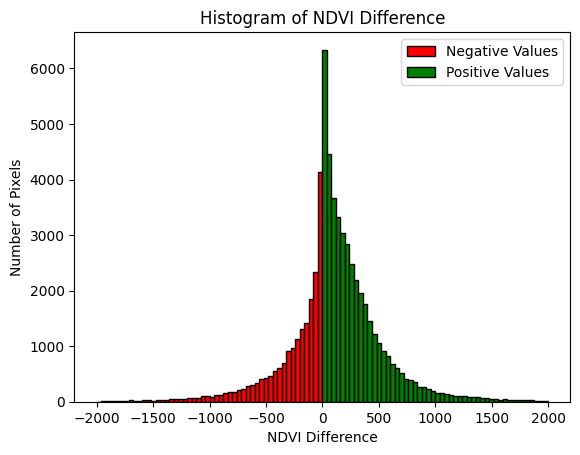

In [31]:
filtered_samples = Filter_difference.sample(region=global_aoi, seed=1, geometries=True, scale=10000, factor=0.03)

# Convert the sample to a NDVI list for plotting
import numpy as np
filtered_data_list = filtered_samples.aggregate_array('NDVI').getInfo()

#  Convert the list to a numpy array
filtered_NDVI_data = np.array(filtered_data_list)
print(f'data length: {len(filtered_NDVI_data)}')

# info
mean_filtered_diff = np.mean(filtered_NDVI_data)
std_filtered_diff = np.std(filtered_NDVI_data)
print(f'mean: {mean_filtered_diff}')
print(f'std: {std_filtered_diff}')
print(f'length: {len(filtered_NDVI_data)}')

# remove outliers
filtered_clean_data = filtered_NDVI_data[np.abs(filtered_NDVI_data) <= 2000]
print(f'\nlength after removing outliers: {len(filtered_clean_data)}')
print(f'mean after removing outliers: {np.mean(filtered_clean_data)}')
print(f'std after removing outliers: {np.std(filtered_clean_data)}')

# plot histogram
import matplotlib.pyplot as plt

# separate the data into positive and negative values
filtered_negative_data = filtered_clean_data[filtered_clean_data< 0]
filtered_positive_data = filtered_clean_data[filtered_clean_data >= 0]

plt.hist(filtered_negative_data, bins=50, color='red', edgecolor='black', label='Negative Values')
plt.hist(filtered_positive_data, bins=50, color='green', edgecolor='black', label='Positive Values')
plt.title('Histogram of NDVI Difference')
plt.xlabel('NDVI Difference')
plt.ylabel('Number of Pixels')
plt.legend()

In [32]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler,StandardScaler
x = df.values 
print(np.max(x))
print(np.min(x))
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1=pd.DataFrame(x_scaled, columns=df.columns)


6169.0
-4159.125


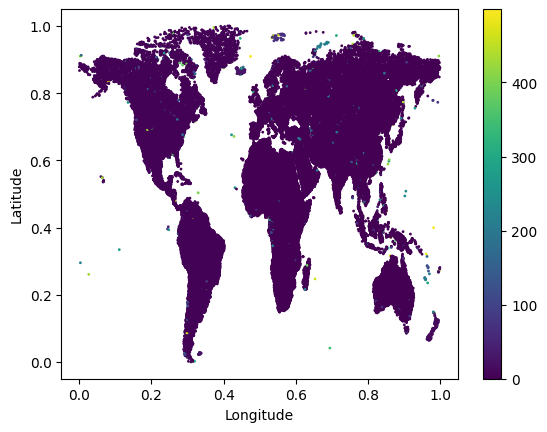

In [33]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import copy

def plot_dendrogram(model, **kwargs):
    print("test")
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

dfAgg = copy.deepcopy(df1)

# NOT RECOMMENDED IT TAKES FOREVER
#ac2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
#hierClust = ac2.fit(dfAgg)
#dendogram = dendrogram((linkage(np.array([pl, pw, sl, sw]), method='single')))
#plot_dendrogram(hierClust, truncate_mode="level", p=2)
#plt.title("Hierarchical Clustering Dendrogram")
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.show()

ac2 = AgglomerativeClustering(n_clusters=500, linkage='single')
data4 = ac2.fit_predict(dfAgg)
labels = ac2.labels_
X=dfAgg.loc[:,['NDVI','Latitude','Longitude']]
X.plot.scatter(x = 'Longitude', y = 'Latitude', c=labels, s=1, cmap='viridis')
plt.show()

100 : 0.034792533687593385
200 : 0.027017066626230456
300 : 0.023333948497875068
400 : 0.020940008222339438
500 : 0.019253155085141388
600 : 0.01798392844528634
700 : 0.01692264018317666
800 : 0.016116930332857115
900 : 0.015397380164349921


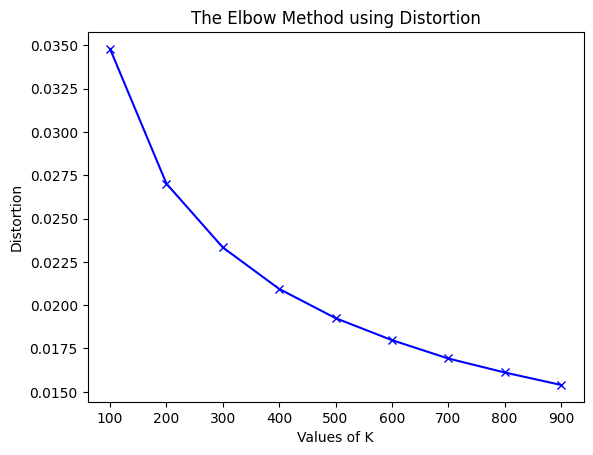

In [34]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(100, 1000, 100)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df1)
    kmeanModel.fit(df1)
 
    distortions.append(sum(np.min(cdist(df1, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / df1.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df1, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / df1.shape[0]
    mapping2[k] = kmeanModel.inertia_


for key, val in mapping1.items():
    print(f'{key} : {val}')





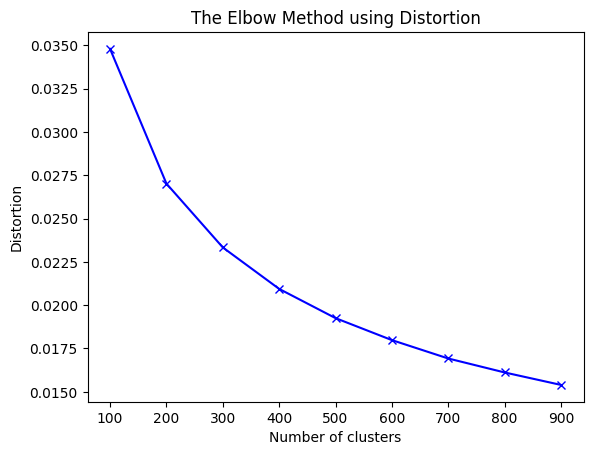

In [48]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

cluster_label
0      0.425251
1      0.411570
2      0.440359
3      0.452409
4      0.403854
         ...   
295    0.426021
296    0.366027
297    0.394833
298    0.326077
299    0.465613
Name: NDVI, Length: 300, dtype: float64
[4, 8, 12, 14, 21, 22, 25, 37, 41, 47, 50, 59, 66, 73, 78, 87, 92, 94, 106, 122, 123, 134, 135, 138, 140, 151, 157, 159, 174, 176, 183, 184, 187, 190, 194, 198, 200, 210, 221, 225, 239, 243, 245, 248, 254, 256, 267, 269, 273, 289]


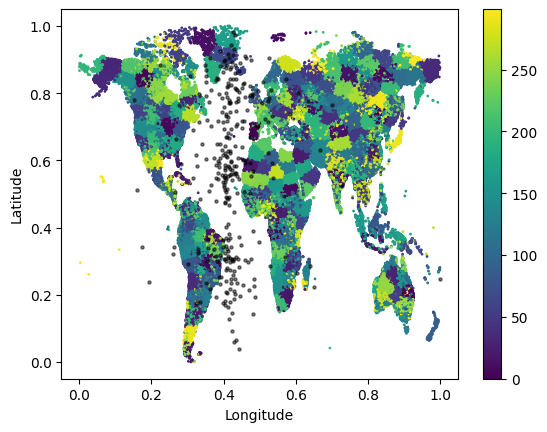

In [52]:
#from haversine import haversine
#origin = (39.50, 98.35)
#paris = (48.8567, 2.3508)
#haversine(origin, paris, miles=True)
import copy
from sklearn.cluster import KMeans
df2 = copy.deepcopy(df1)

kmeans2 = KMeans(n_clusters=300)
kmeans2.fit(df2)
labels = kmeans2.labels_
df2['cluster_label'] = kmeans2.predict(df2)
centers = kmeans2.cluster_centers_ # Coordinates of cluster centers.
labels = df2['cluster_label'] # Labels of each point


groups = df2.groupby(['cluster_label'])['NDVI'].median()
clustersWOImpact =[]
clustersNeg = []
clustersPos = []
print(groups)
idx = 0
for i in groups:
    if i >=0.4 and i<0.41:
        clustersWOImpact.append(idx)
    if i >=0.41:
        clustersPos.append(idx)
    else:
        clustersNeg.append(idx)
    idx +=1
print(clustersWOImpact)

df2.plot.scatter(x = 'Longitude', y = 'Latitude', c=labels, s=1, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=5, alpha=0.5)


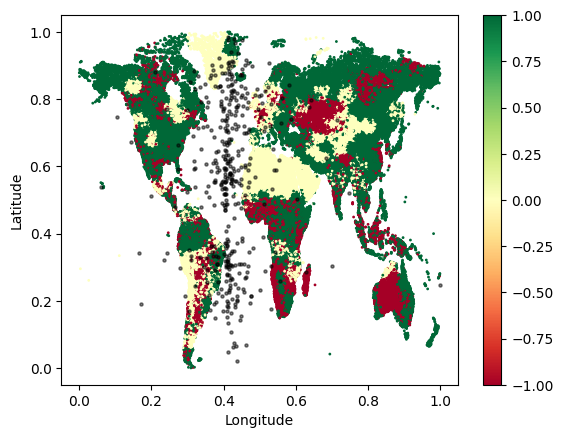

In [51]:
for i, row in df2.iterrows():
    cluster = df2.at[i,'cluster_label']
    if cluster in clustersWOImpact:
        cluster = 0
    elif cluster in clustersPos:
        cluster = 1
    else:
        cluster = -1
    df2.at[i,'cluster_dir'] = cluster

labels = df2['cluster_dir'] # Labels of each point
df2.plot.scatter(x = 'Longitude', y = 'Latitude', c=labels, s=1, cmap='RdYlGn')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=5, alpha=0.5)


cluster_label
0      0.402906
1      0.458778
2      0.406008
3      0.413117
4      0.400740
         ...   
295    0.424440
296    0.412502
297    0.482329
298    0.439758
299    0.432154
Name: NDVI, Length: 300, dtype: float64
[0, 2, 4, 9, 10, 12, 13, 16, 17, 26, 29, 32, 33, 34, 37, 39, 41, 53, 63, 66, 69, 80, 81, 84, 85, 86, 88, 96, 98, 101, 102, 103, 107, 112, 113, 121, 123, 124, 126, 127, 145, 150, 151, 160, 166, 167, 169, 172, 176, 177, 178, 182, 191, 193, 194, 195, 197, 201, 203, 208, 212, 216, 232, 234, 235, 237, 242, 253, 263, 264, 273, 277, 278, 279, 292, 293]


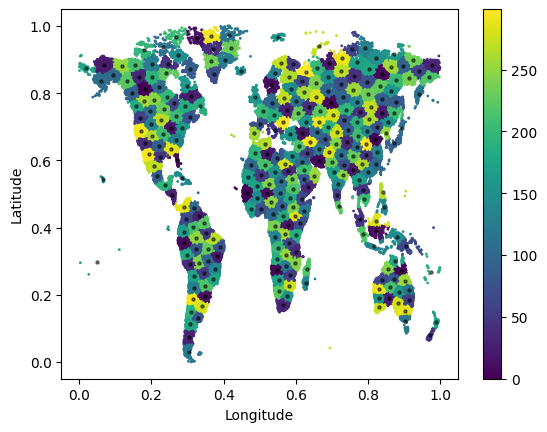

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

dfPlus = copy.deepcopy(df1)


kmeans = KMeans(n_clusters = 300, max_iter=1000, init ='k-means++')
lat_long = dfPlus[dfPlus.columns[1:3]]
ndviVal = dfPlus[dfPlus.columns[0]]
weighted_kmeans_clusters = kmeans.fit(lat_long, sample_weight = ndviVal) 
dfPlus['cluster_label'] = kmeans.predict(lat_long, sample_weight = ndviVal)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = dfPlus['cluster_label'] # Labels of each point

groups = dfPlus.groupby(['cluster_label'])['NDVI'].median()
clustersWOImpact =[]
clustersNeg = []
clustersPos = []
print(groups)
idx = 0
for i in groups:
    if i >=0.4 and i<0.41:
        clustersWOImpact.append(idx)
    if i >=0.41:
        clustersPos.append(idx)
    else:
        clustersNeg.append(idx)
    idx +=1
print(clustersWOImpact)

dfPlus.plot.scatter(x = 'Longitude', y = 'Latitude', c=labels, s=1, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=5, alpha=0.5)


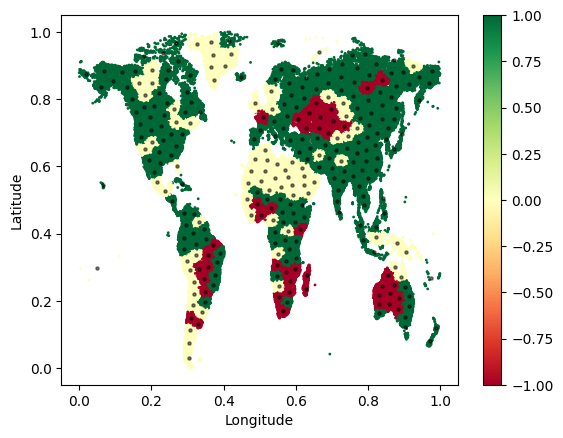

In [38]:
for i, row in df1.iterrows():
    cluster = dfPlus.at[i,'cluster_label']
    if cluster in clustersWOImpact:
        cluster = 0
    elif cluster in clustersPos:
        cluster = 1
    else:
        cluster = -1
    dfPlus.at[i,'cluster_dir'] = cluster

labels = dfPlus['cluster_dir'] # Labels of each point
dfPlus.plot.scatter(x = 'Longitude', y = 'Latitude', c=labels, s=1, cmap='RdYlGn')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=5, alpha=0.5)


In [39]:
sample3 = Filter_difference.sample(region=global_aoi, seed=1, geometries=True, scale=10000, factor=0.03)
samples_with_coordinates = sample3.map(add_coordinates)
data_list2 = samples_with_coordinates.aggregate_array('NDVI').getInfo()
NDVI_data2 = np.array(data_list2)
long = samples_with_coordinates.aggregate_array('longitude').getInfo()
NDVI_long = np.array(long)
lat = samples_with_coordinates.aggregate_array('latitude').getInfo()
NDVI_lat = np.array(lat)
evi = samples_with_coordinates.aggregate_array('EVI').getInfo()
EVI_data = np.array(evi)
print(np.shape(NDVI_data2))
print(np.shape(NDVI_long))
print(np.shape(NDVI_lat))
print(np.shape(EVI_data))
df3 = pd.DataFrame(NDVI_data2, columns=['NDVI'])
df3['Longitude'] = NDVI_long
df3['Latitude'] = NDVI_lat
df3['EVI'] = EVI_data

df3.head()

(63741,)
(63741,)
(63741,)
(63741,)


,NDVI,Longitude,Latitude,EVI
0,35.291667,-68.631218,-46.258929,81.675000
1,24.250000,-104.295037,33.758576,136.791667
2,105.541667,-131.587400,68.251348,72.841667
3,21.666667,11.250034,32.719265,18.250000
4,700.625000,-56.029237,-31.864748,330.166667


In [40]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler,StandardScaler
x = df3.values 
print(np.max(x))
print(np.min(x))
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df3=pd.DataFrame(x_scaled, columns=df3.columns)

6169.0
-4159.125


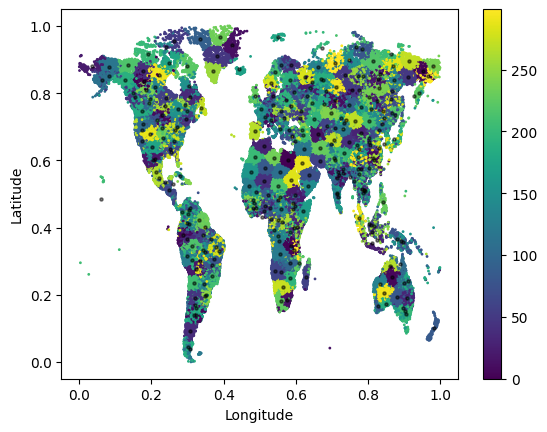

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

dfFour = copy.deepcopy(df3)

kmeans = KMeans(n_clusters = 300, max_iter=2000, init ='k-means++')
lat_long = dfFour[dfFour.columns[1:4]]
ndviVal = dfFour[dfFour.columns[0]]
#ndviVal.drop('Longitude', axis=1, inplace=True)
#ndviVal.drop('Latitude', axis=1, inplace=True)

weighted_kmeans_clusters = kmeans.fit(lat_long, sample_weight = ndviVal) 
dfFour['cluster_label'] = kmeans.predict(lat_long, sample_weight = ndviVal)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = dfFour['cluster_label'] # Labels of each point

dfFour.plot.scatter(x = 'Longitude', y = 'Latitude', c=labels, s=1, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=5, alpha=0.5)


cluster_label
0      0.403939
1      0.386197
2      0.419048
3      0.424000
4      0.448846
         ...   
295    0.418071
296    0.485614
297    0.442527
298    0.456623
299    0.433741
Name: NDVI, Length: 300, dtype: float64
[0, 7, 9, 17, 30, 32, 37, 41, 46, 47, 57, 72, 82, 84, 91, 95, 99, 108, 109, 111, 115, 122, 125, 126, 127, 144, 147, 154, 157, 173, 183, 199, 203, 205, 207, 210, 214, 228, 229, 233, 234, 236, 240, 254, 261, 269, 271, 274, 278, 281, 284, 290, 291, 292]


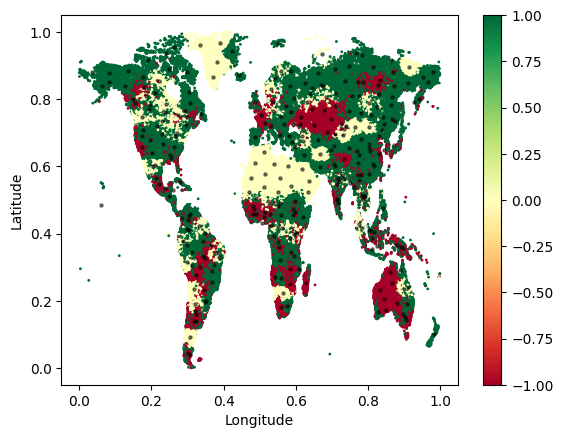

In [42]:
groups = dfFour.groupby(['cluster_label'])['NDVI'].median()
clustersWOImpact =[]
clustersNeg = []
clustersPos = []
clusterMedian = []
print(groups)
idx = 0
for i in groups:
    if i >=0.4 and i<0.41:
        clustersWOImpact.append(idx)
    if i >=0.41:
        clustersPos.append(idx)
    else:
        clustersNeg.append(idx)
    idx +=1
    clusterMedian.append(i)
print(clustersWOImpact)

for i, row in dfFour.iterrows():
    cluster = dfFour.at[i,'cluster_label']
    dfFour.at[i,'cluster_impact'] = clusterMedian[cluster]
    if cluster in clustersWOImpact:
        cluster = 0
    elif cluster in clustersPos:
        cluster = 1
    else:
        cluster = -1
    dfFour.at[i,'cluster_dir'] = cluster
    

labels = dfFour['cluster_dir'] # Labels of each point
dfFour.plot.scatter(x = 'Longitude', y = 'Latitude', c=labels, s=1, cmap='RdYlGn')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=5, alpha=0.5)

<bound method NDFrame.head of            NDVI  Longitude  Latitude       EVI  cluster_label  cluster_impact  \
0      0.406116   0.308123  0.064962  0.423249             37        0.404032   
1      0.405047   0.208817  0.641529  0.431360            175        0.424815   
2      0.412918   0.132821  0.890067  0.421950            216        0.419531   
3      0.404797   0.530554  0.634040  0.413916             30        0.404950   
4      0.470536   0.343214  0.168680  0.459815            247        0.431540   
...         ...        ...       ...       ...            ...             ...   
63736  0.395457   0.223650  0.795070  0.386128             57        0.403827   
63737  0.403227   0.547110  0.521546  0.411985            214        0.403962   
63738  0.417693   0.331232  0.452668  0.444373            187        0.415733   
63739  0.421499   0.587384  0.366291  0.440268              2        0.419048   
63740  0.403784   0.542374  0.588935  0.412911            234        0.403082  

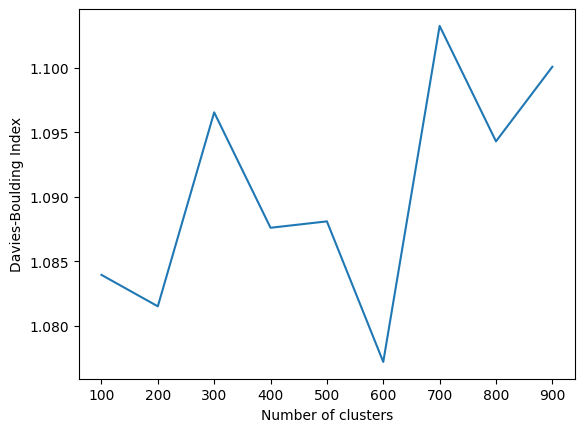

In [43]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

print(dfFour.head)
dimensions = np.array(dfFour.values)
labels = dimensions[:,4]
dimensions = dimensions[:,0:4]

resultsDB = {}
resultsSil = {}

for i in range(100,1000,100):
    kmeans = KMeans(n_clusters = i, max_iter=2000, init ='k-means++')
    labels = kmeans.fit_predict(dimensions)
    db_index = davies_bouldin_score(dimensions, labels)
    resultsDB.update({i: db_index})
    db_index = silhouette_score(dimensions, labels)
    resultsSil.update({i: db_index})


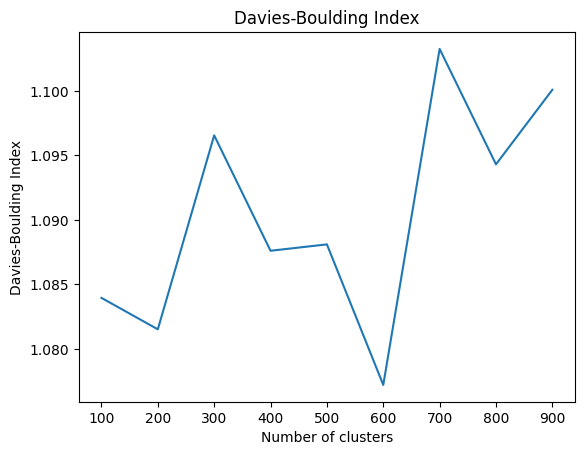

In [46]:
plt.plot(list(resultsDB.keys()), list(resultsDB.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.title('Davies-Boulding Index')
plt.show()

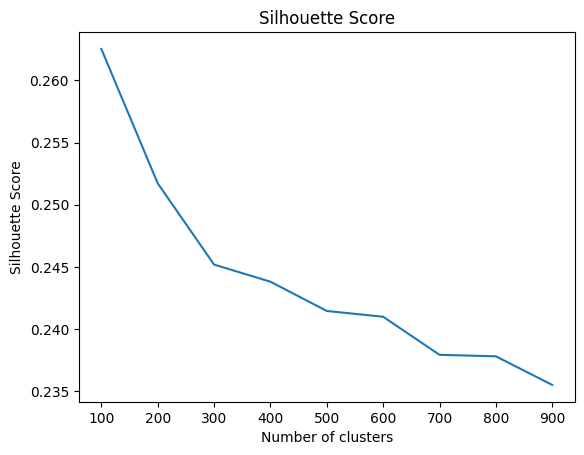

In [47]:
plt.plot(list(resultsSil.keys()), list(resultsSil.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title('Silhouette Score')
plt.show()

In [45]:
#from scipy.spatial import distance_matrix
#from sklearn.metrics import pairwise_distances

#proximityMatrix = pairwise_distances(df3.values, metric='cosine')
#proximityMatrix = distance_matrix(df3.values, df3.values)

#sortedProximityMatrix = proximityMatrix[np.argsort(labels)][:, np.argsort(labels)]
#labelsSor = labels[np.argsort(labels)]

#sortedProximityMatrix = sortedProximityMatrix / np.max(sortedProximityMatrix)
#sortedProximityMatrix = 1- sortedProximityMatrix / np.max(sortedProximityMatrix)

#incidence_matrix = np.zeros_like(sortedProximityMatrix)

#for i in range(len(np.unique(labels))):
#    indicesOfLabel = np.where(label == i)[0]
#    incidence_matrix[indicesOfLabel,indicesOfLabel] = 1

#corr_org = np.corrcoef(sorted_pairwisedist.flatten(), incidence_matrix.flatten())[0, 1]
#print(corr_org)